### Read data: Healthcare providers' performance from Lu et al. (2020)
https://www.frontiersin.org/articles/10.3389/fped.2020.00544/full

In [1]:
import pandas as pd


filename = "/Users/.../Data_HC_paper.csv"

#Read csv file
pdf = pd.read_csv(filename)
print ("Shape of dataset: ", pdf.shape)


Shape of dataset:  (50, 34)


### Data cleaning

- Removing participant_id column from the datafile

In [2]:
df = pd.DataFrame(pdf)

In [4]:
# Selecting all the features except the participant_id

df_new = df[df.columns[1:]]

### Handling missing values
- **For continuous features: replacing missing values with mean values**
- **For categorical features: replacing missing values with mode values** 


In [5]:
df_new = df_new.fillna( {
    'Months_LastNRPcourse':df_new[['Months_LastNRPcourse']].mean().iloc[0],
    'Years_NeonatalCare':df_new[['Years_NeonatalCare']].mean().iloc[0],
    'HoursVideoMo':df_new[['HoursVideoMo']].mean().iloc[0],
    'YearsVideoExp':df_new[['YearsVideoExp']].mean().iloc[0],
                       
    'Mo2Test0F1P':df_new['Mo2Test0F1P'].mode().iloc[0],
    'Mo5Test0F1P':df_new['Mo5Test0F1P'].mode().iloc[0],
    'StressfulScen1_5':df_new['StressfulScen1_5'].mode().iloc[0]
} )

df_new.dtypes

Gender1F_2M               int64
Months_LastNRPcourse    float64
Education1_7              int64
Registration1_6           int64
Position1_6               int64
Years_NeonatalCare      float64
Pretest0F1P               int64
Posttest0F1P              int64
Mo2Test0F1P             float64
Mo5Test0F1P             float64
Pacing1Y2N                int64
Terminology1Y2N           int64
DecisionsQuickly1Y2N      int64
Find_Actions1Y2N          int64
RealisticScen1_5          int64
StressfulScen1_5        float64
EnjoyPlay1_5              int64
GameBene1_5               int64
Fixed1                    int64
Fixed2                    int64
Growth1                   int64
Growth2                   int64
HoursVideoMo              int64
YearsVideoExp           float64
PrevExp1Y2N               int64
EnjoyReading1_5           int64
EnjoyUsing1_5             int64
LearningTech1_5           int64
LookForward1_5            int64
InterestedLearn1_5        int64
TechInEd1_5               int64
EnjoyTec

In order to use the Gower package, we need to create the categorical features as string features
- First, separate continuous features from the file
- Second, convert the rest of the features as strings or objects
- third, add back the features that were removed in the first step 

In [6]:
df_str = df_new[df_new.columns.difference(['Months_LastNRPcourse', 'Years_NeonatalCare', 'HoursVideoMo', 'YearsVideoExp'])]

In [7]:
df_str2= df_str.astype(str)

In [8]:
# Combine back with the four features
#df_new.insert(0, 'Participant_ID', df['Participant_ID'])
df_str2.insert(0, 'Months_LastNRPcourse', df_new['Months_LastNRPcourse'])
df_str2.insert(1, 'Years_NeonatalCare', df_new['Years_NeonatalCare'])
df_str2.insert(2, 'HoursVideoMo', df_new['HoursVideoMo'])
df_str2.insert(3, 'YearsVideoExp', df_new['YearsVideoExp'])
#df_str2

In [9]:
# Making sure these features are saved as string
df_str2.dtypes
df_str2['DecisionsQuickly1Y2N'][0]

'1'

In [10]:
# Adding labels to the scaled data

scaled_df = pd.DataFrame(df_str2, columns= df_new.columns)
#scaled_df

### Gower package for catagorical features

We can see that the variables are a mix of categorical and continuous values. We will use the Gower package to calculate the distance matrix for our feature sets.<br>
(link: https://towardsdatascience.com/clustering-on-numerical-and-categorical-features-6e0ebcf1cbad)

In [330]:
pip install gower

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
The folder you are executing pip from can no longer be found.
Note: you may need to restart the kernel to use updated packages.


In [11]:
import gower

dist_matrix = gower.gower_matrix(scaled_df)
dist_matrix

array([[0.        , 0.44273946, 0.5764492 , ..., 0.53128326, 0.4115267 ,
        0.52452624],
       [0.44273946, 0.        , 0.3418784 , ..., 0.50969946, 0.23756196,
        0.4454232 ],
       [0.5764492 , 0.3418784 , 0.        , ..., 0.4997114 , 0.20907836,
        0.42106783],
       ...,
       [0.53128326, 0.50969946, 0.4997114 , ..., 0.        , 0.50474936,
        0.55714285],
       [0.4115267 , 0.23756196, 0.20907836, ..., 0.50474936, 0.        ,
        0.32512078],
       [0.52452624, 0.4454232 , 0.42106783, ..., 0.55714285, 0.32512078,
        0.        ]], dtype=float32)

### Clustering using scikit-learn 

In [13]:
import numpy as np 
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

In [14]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'ward')

/Users/farzanayasmin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


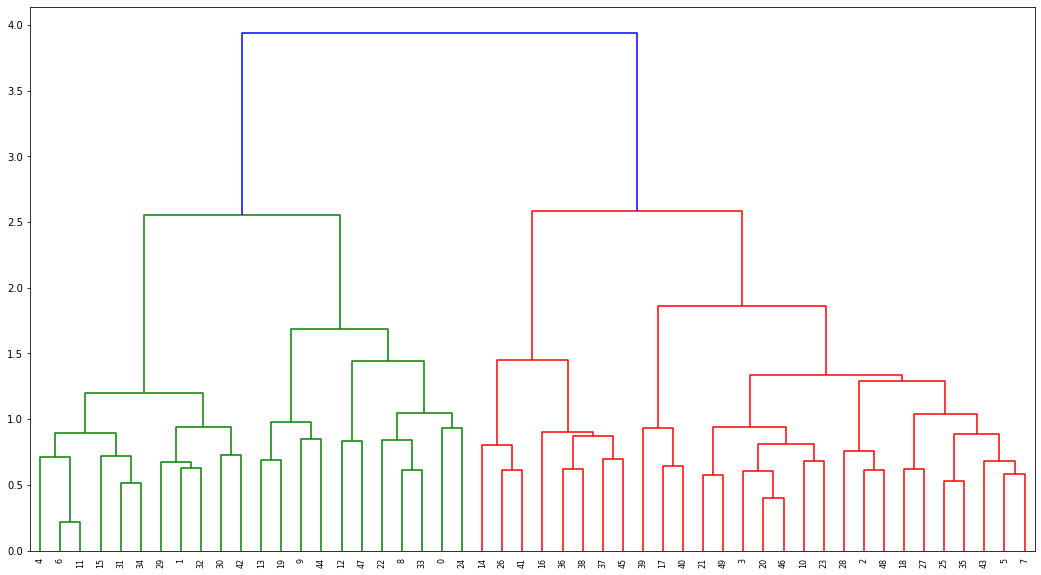

In [15]:
import pylab
fig = pylab.figure(figsize=(18,10))
dendro = hierarchy.dendrogram(Z_using_dist_matrix, leaf_rotation=90, leaf_font_size =8, orientation = 'top')

In [137]:
#Z_using_dist_matrix
#help(hierarchy.linkage)

In [16]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
agglom.fit(dist_matrix)

agglom.labels_

/Users/farzanayasmin/anaconda3/lib/python3.7/site-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 1, 0, 1, 1])

In [17]:
df_str2['cluster_'] = agglom.labels_
#df_str2


In [18]:
# Add back the Paricipant_id column to the datafile to compare the cluster labels

df_str2.insert(0, 'Participant_ID', df['Participant_ID'])

In [625]:
df_str2.to_csv("/Users/.../Data_HC_Ward.csv")

In [19]:
linkage_matrix = hierarchy.linkage(agglom.children_)


- **Use 'Truncate_mode' options to choose how many clusters we can choose.**

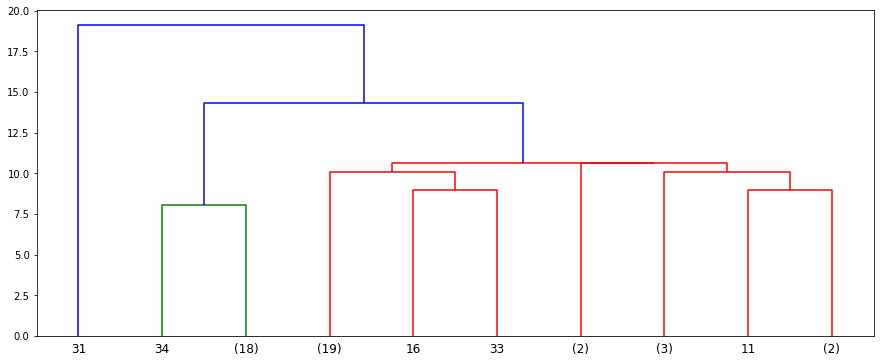

In [27]:
plt.figure(figsize=(15,6))
dendro= hierarchy.dendrogram(linkage_matrix, truncate_mode = 'lastp', p=10)